# Import libraries & Load data

In [8]:
# dataset
import numpy as np
import tensorflow as tf
from numpy import genfromtxt
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
print(tf.__version__)
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd

np.random.seed(0) # please do not remove this line
tf.random.set_seed(0)

data = genfromtxt('titanic_modified_dataset.csv', delimiter=',', skip_header=1)

# shuffle
idx = np.arange(data.shape[0])
np.random.shuffle(idx)
data = data[idx]

N = data.shape[0]
X = data[:,1:-1]
y = data[:,-1]

print(X[:5], X.shape)
print(y[:5], y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2.9.1
[[  3.       0.      28.       0.       0.      14.4583   1.       0.    ]
 [  3.       0.      28.       0.       0.       7.55     0.       0.    ]
 [  3.       0.       7.       4.       1.      29.125    2.       3.    ]
 [  1.       1.      28.       1.       0.     146.5208   1.       1.    ]
 [  3.       1.      29.       0.       2.      15.2458   1.       1.    ]] (891, 8)
[0. 0. 0. 1. 1.] (891,)


# Train

In [9]:
# 2-class logistic regression in Keras
model = Sequential()
model.add(Dense(1, activation='sigmoid', input_dim=X_train.shape[1]))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['mse', 'mae'])
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))


Epoch 1/200
23/23 [==============================] - 0s 7ms/step - loss: 7.1016 - mse: 0.6113 - mae: 0.6227 - val_loss: 6.6327 - val_mse: 0.5266 - val_mae: 0.5386
Epoch 2/200
23/23 [==============================] - 0s 2ms/step - loss: 6.2379 - mse: 0.5907 - mae: 0.6120 - val_loss: 5.9008 - val_mse: 0.5042 - val_mae: 0.5292
Epoch 3/200
23/23 [==============================] - 0s 2ms/step - loss: 5.4690 - mse: 0.5525 - mae: 0.5927 - val_loss: 5.2134 - val_mse: 0.4637 - val_mae: 0.5115
Epoch 4/200
23/23 [==============================] - 0s 2ms/step - loss: 4.7539 - mse: 0.4879 - mae: 0.5563 - val_loss: 4.5861 - val_mse: 0.4098 - val_mae: 0.4834
Epoch 5/200
23/23 [==============================] - 0s 2ms/step - loss: 4.0975 - mse: 0.4161 - mae: 0.5078 - val_loss: 4.0136 - val_mse: 0.3649 - val_mae: 0.4525
Epoch 6/200
23/23 [==============================] - 0s 2ms/step - loss: 3.5583 - mse: 0.3560 - mae: 0.4573 - val_loss: 3.5795 - val_mse: 0.3447 - val_mae: 0.4329
Epoch 7/200
23/23 [===

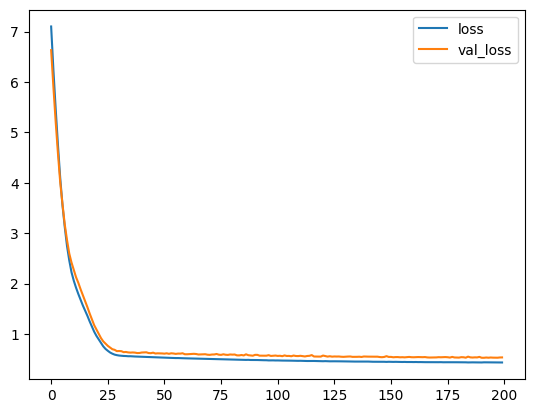

In [10]:
#plot the loss and validation loss of the dataset
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

In [11]:
# Best LOSS, MSE, MAE with 100 epoch: (loss: 0.4747 - mse: 0.1450 - mae: 0.3083)

In [12]:
# Best LOSS, MSE, MAE with 200 epochs: (loss: 0.4348 - mse: 0.1371 - mae: 0.2817)

In [13]:
#evaluate the model
model.evaluate(X_test, y_test, batch_size=128)

#[0.5351982712745667, 0.1759704351425171, 0.3276697099208832]

2/2 [==============================] - 0s 7ms/step - loss: 0.5352 - mse: 0.1760 - mae: 0.3277


[0.5351982712745667, 0.1759704351425171, 0.3276697099208832]